In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
os.chdir(r"C:\Users\Sarkar\Documents\GitHub\Time_series")

In [4]:
os.listdir()

['.git', '.gitattributes', 'MonthWiseMarketArrivals_Clean.csv']

In [5]:
df=pd.read_csv("MonthWiseMarketArrivals_Clean.csv")

In [6]:
pd.set_option('display.max_columns',500)

In [7]:
df.shape

(10227, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [9]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


***
# Observations
* The data constitutes granularity of 10 and cardinality of 10227
* There are 5 object type variables and 5 int64 type variables 
* data contains no null values
***

In [10]:
df["state"].value_counts()

MS     4354
KNT     958
GUJ     929
UP      617
PB      593
RAJ     462
TN      350
MP      309
AP      278
HR      233
WB      187
JK      163
DEL     158
BHR     140
ASM     134
OR      129
JH      123
KEL      55
HP       40
KER      13
CH        2
Name: state, dtype: int64

In [11]:
df["city"].value_counts()

LASALGAON        242
PIMPALGAON       224
MANMAD           218
LONAND           211
MAHUVA           210
                ... 
SRIGANGANAGAR      1
MEERUT             1
RAJAHMUNDRY        1
NEEMUCH            1
CHALLAKERE         1
Name: city, Length: 117, dtype: int64

In [13]:
df[df["city"]=="LASALGAON"]

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
5399,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,January-1996
5400,LASALGAON(MS),January,1997,241225,126,323,290,MS,LASALGAON,January-1997
5401,LASALGAON(MS),January,1998,125731,225,1447,1037,MS,LASALGAON,January-1998
5402,LASALGAON(MS),January,1999,236001,310,545,498,MS,LASALGAON,January-1999
5403,LASALGAON(MS),January,2000,390783,145,341,225,MS,LASALGAON,January-2000
...,...,...,...,...,...,...,...,...,...,...
5636,LASALGAON(MS),December,2011,213720,223,803,575,MS,LASALGAON,December-2011
5637,LASALGAON(MS),December,2012,498275,586,1390,1207,MS,LASALGAON,December-2012
5638,LASALGAON(MS),December,2013,343533,955,1690,1335,MS,LASALGAON,December-2013
5639,LASALGAON(MS),December,2014,246504,884,1705,1514,MS,LASALGAON,December-2014


In [14]:
df["Date"]=pd.to_datetime(df["date"])

In [15]:
df_new=df.drop(columns=["month","year","date"])

In [16]:
df_new.head()

,market,quantity,priceMin,priceMax,priceMod,state,city,Date
0,ABOHAR(PB),2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),1035,523,686,605,PB,ABOHAR,2012-01-01


In [17]:
df_new.sort_values(by="Date",inplace=True)

# Onion price in Mumbai

In [18]:
df_mum=df_new[df_new["city"]=="LASALGAON"]

In [19]:
df_mum.head()

,market,quantity,priceMin,priceMax,priceMod,state,city,Date
5399,LASALGAON(MS),225063,160,257,226,MS,LASALGAON,1996-01-01
5420,LASALGAON(MS),196164,133,229,186,MS,LASALGAON,1996-02-01
5441,LASALGAON(MS),178992,155,274,243,MS,LASALGAON,1996-03-01
5461,LASALGAON(MS),192592,136,279,254,MS,LASALGAON,1996-04-01
5481,LASALGAON(MS),237574,154,312,269,MS,LASALGAON,1996-05-01


In [20]:
df_mum_mod=df_mum.drop(columns=["market","priceMin","priceMax","state","city"])

In [21]:
df_mum_mod.set_index(["Date"],inplace=True)

In [22]:
df_mum_mod.head()

,quantity,priceMod
Date,,
1996-01-01,225063,226
1996-02-01,196164,186
1996-03-01,178992,243
1996-04-01,192592,254
1996-05-01,237574,269


<AxesSubplot:xlabel='Date'>

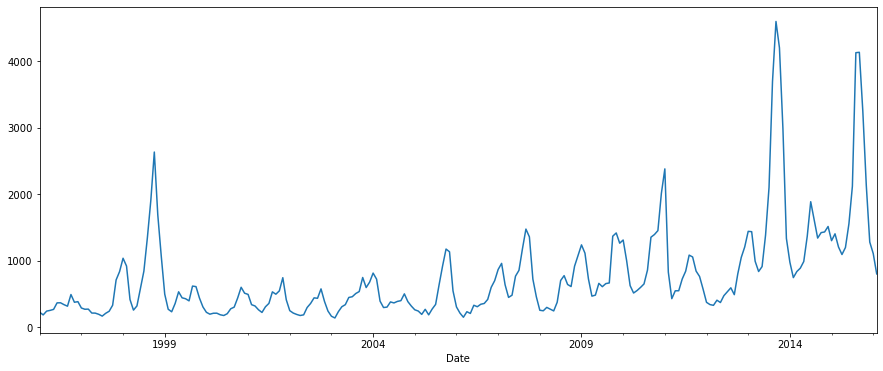

In [23]:
df_mum_mod["priceMod"].plot(figsize=(15,6))

# Decomposition

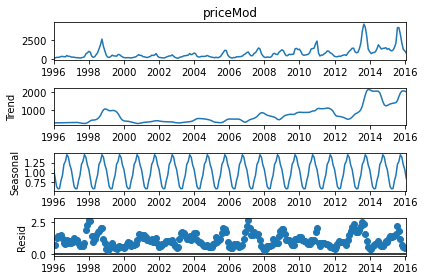

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(df_mum_mod["priceMod"],model="multiplicative",two_sided=False,extrapolate_trend=4)
decompose.plot()
plt.show()

In [25]:
pd.DataFrame({"Actual Value":decompose.observed,"SI":decompose.seasonal,
             "Trend":decompose.trend,"IT":decompose.resid})

,Actual Value,SI,Trend,IT
Date,,,,
1996-01-01,226.0,1.077431,303.566667,0.690979
1996-02-01,186.0,0.850965,305.320833,0.715888
1996-03-01,243.0,0.647092,307.075000,1.222913
1996-04-01,254.0,0.590844,308.829167,1.392011
1996-05-01,269.0,0.598310,310.583333,1.447599
...,...,...,...,...
2015-10-01,3248.0,1.447253,1950.750000,1.150456
2015-11-01,2134.0,1.383567,2056.083333,0.750159
2015-12-01,1280.0,1.191827,2075.583333,0.517436


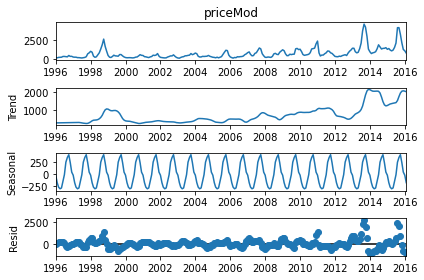

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose1=seasonal_decompose(df_mum_mod["priceMod"],model="additive",two_sided=False,extrapolate_trend=4)
decompose1.plot()
plt.show()

In [27]:
pd.DataFrame({"Actual Value":decompose1.observed,"SI":decompose1.seasonal,
             "Trend":decompose1.trend,"IT":decompose1.resid})

,Actual Value,SI,Trend,IT
Date,,,,
1996-01-01,226.0,-27.305915,303.566667,-50.260751
1996-02-01,186.0,-183.933098,305.320833,64.612264
1996-03-01,243.0,-276.964328,307.075000,212.889328
1996-04-01,254.0,-312.006203,308.829167,257.177036
1996-05-01,269.0,-294.277245,310.583333,252.693911
...,...,...,...,...
2015-10-01,3248.0,401.915464,1950.750000,895.334536
2015-11-01,2134.0,233.423589,2056.083333,-155.506922
2015-12-01,1280.0,37.608797,2075.583333,-833.192130


# Log Transformation

<AxesSubplot:xlabel='Date'>

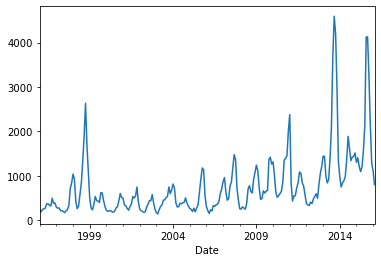

In [28]:
df_mum_mod["priceMod"].plot()

<AxesSubplot:xlabel='Date'>

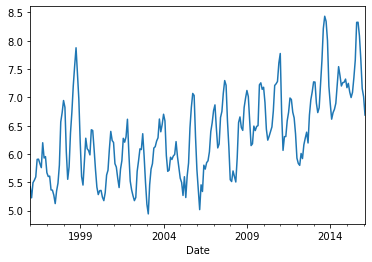

In [29]:
np.log(df_mum_mod["priceMod"]).plot()

In [30]:
df_mum_mod["log_priceMod"] = np.log(df_mum_mod["priceMod"])
df_Mumbai_mean = df_mum_mod["log_priceMod"].mean()
df_mum_mod["Mean_price"] = np.exp(df_Mumbai_mean)
df_mum_mod.head()

,quantity,priceMod,log_priceMod,Mean_price
Date,,,,
1996-01-01,225063,226,5.420535,564.668286
1996-02-01,196164,186,5.225747,564.668286
1996-03-01,178992,243,5.493061,564.668286
1996-04-01,192592,254,5.537334,564.668286
1996-05-01,237574,269,5.594711,564.668286


In [31]:
def RMSE(actual, predict):
    mse = (actual - predict)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [32]:
mean_modelRMSE = RMSE(df_mum_mod["priceMod"], df_mum_mod["Mean_price"])
mean_modelRMSE

739.7611298704511

In [33]:
mean_modelRMSE = RMSE(df_mum_mod["log_priceMod"], df_mum_mod["Mean_price"])
mean_modelRMSE

558.3325331516728

In [34]:
Result_df = pd.DataFrame(columns =["Model","Forcast","RMSE"])
Result_df.loc[0,"Model"] = "Mean Model"
Result_df.loc[0,"Forcast"] = np.exp(df_Mumbai_mean)
Result_df.loc[0,"RMSE"] = mean_modelRMSE
Result_df

,Model,Forcast,RMSE
0,Mean Model,564.668286,558.332533


In [35]:
ts = df_mum_mod["log_priceMod"]

In [36]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts, nlags=20)
lag_acf

array([1.        , 0.90931823, 0.74423705, 0.56526742, 0.41640806,
       0.31563975, 0.2822883 , 0.30969338, 0.36047341, 0.408564  ,
       0.44623515, 0.44575338, 0.41038303, 0.35458443, 0.30474411,
       0.24959298, 0.19183027, 0.14785997, 0.13757986, 0.15322057,
       0.195587  ])

# ACF Plot:

<AxesSubplot:>

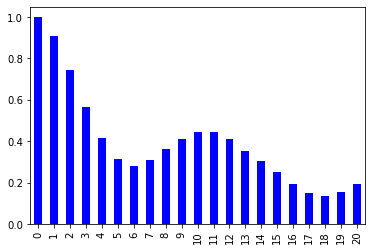

In [37]:
ACF = pd.Series(lag_acf)
ACF.plot(kind="bar", color="blue")

# PACF Plot:

<AxesSubplot:>

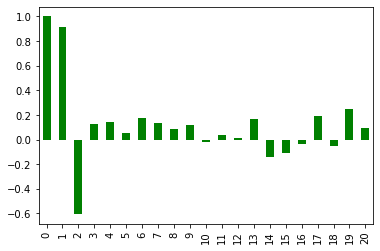

In [36]:
lag_pacf = pacf(ts, nlags=20, method='ols')
PACF = pd.Series(lag_pacf)
PACF.plot(kind="bar", color="green")

#  Exponential smoothing using Holt-Winter’s technique 

In [37]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  

In [38]:
m = 12
alpha = 1/(2*m)

In [39]:
df_mum_mod['HWES1'] = SimpleExpSmoothing(df_mum_mod["priceMod"]).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues

C:\Users\Sarkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


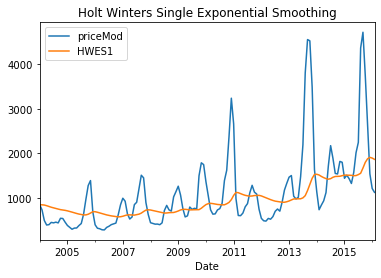

In [40]:
df_mum_mod[["priceMod",'HWES1']].plot(title="Holt Winters Single Exponential Smoothing");

In [41]:
mean_modelRMSE = RMSE(df_mum_mod["HWES1"], df_mum_mod["Mean_price"])
mean_modelRMSE

345.01556026818616

In [42]:
hw = df_mum_mod["HWES1"]

In [43]:
lag_acf = acf(hw, nlags=20)
lag_acf

array([1.        , 0.97036444, 0.93191443, 0.88824471, 0.84467694,
       0.80589765, 0.77518109, 0.75190821, 0.73080058, 0.71051471,
       0.68929314, 0.66628418, 0.64180408, 0.61628818, 0.58980406,
       0.56359001, 0.53837948, 0.51430191, 0.4919145 , 0.4722238 ,
       0.45563124])

# ACF plot:

<AxesSubplot:>

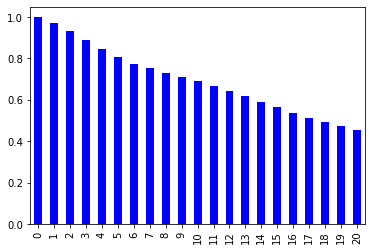

In [44]:
ACF = pd.Series(lag_acf)
ACF.plot(kind="bar", color="blue")

# PACF Plot:

<AxesSubplot:>

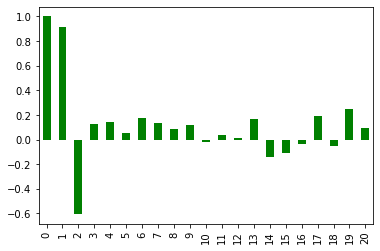

In [45]:
lag_pacf = pacf(ts, nlags=20, method='ols')
PACF = pd.Series(lag_pacf)
PACF.plot(kind="bar", color="green")